<Figure size 640x480 with 0 Axes>

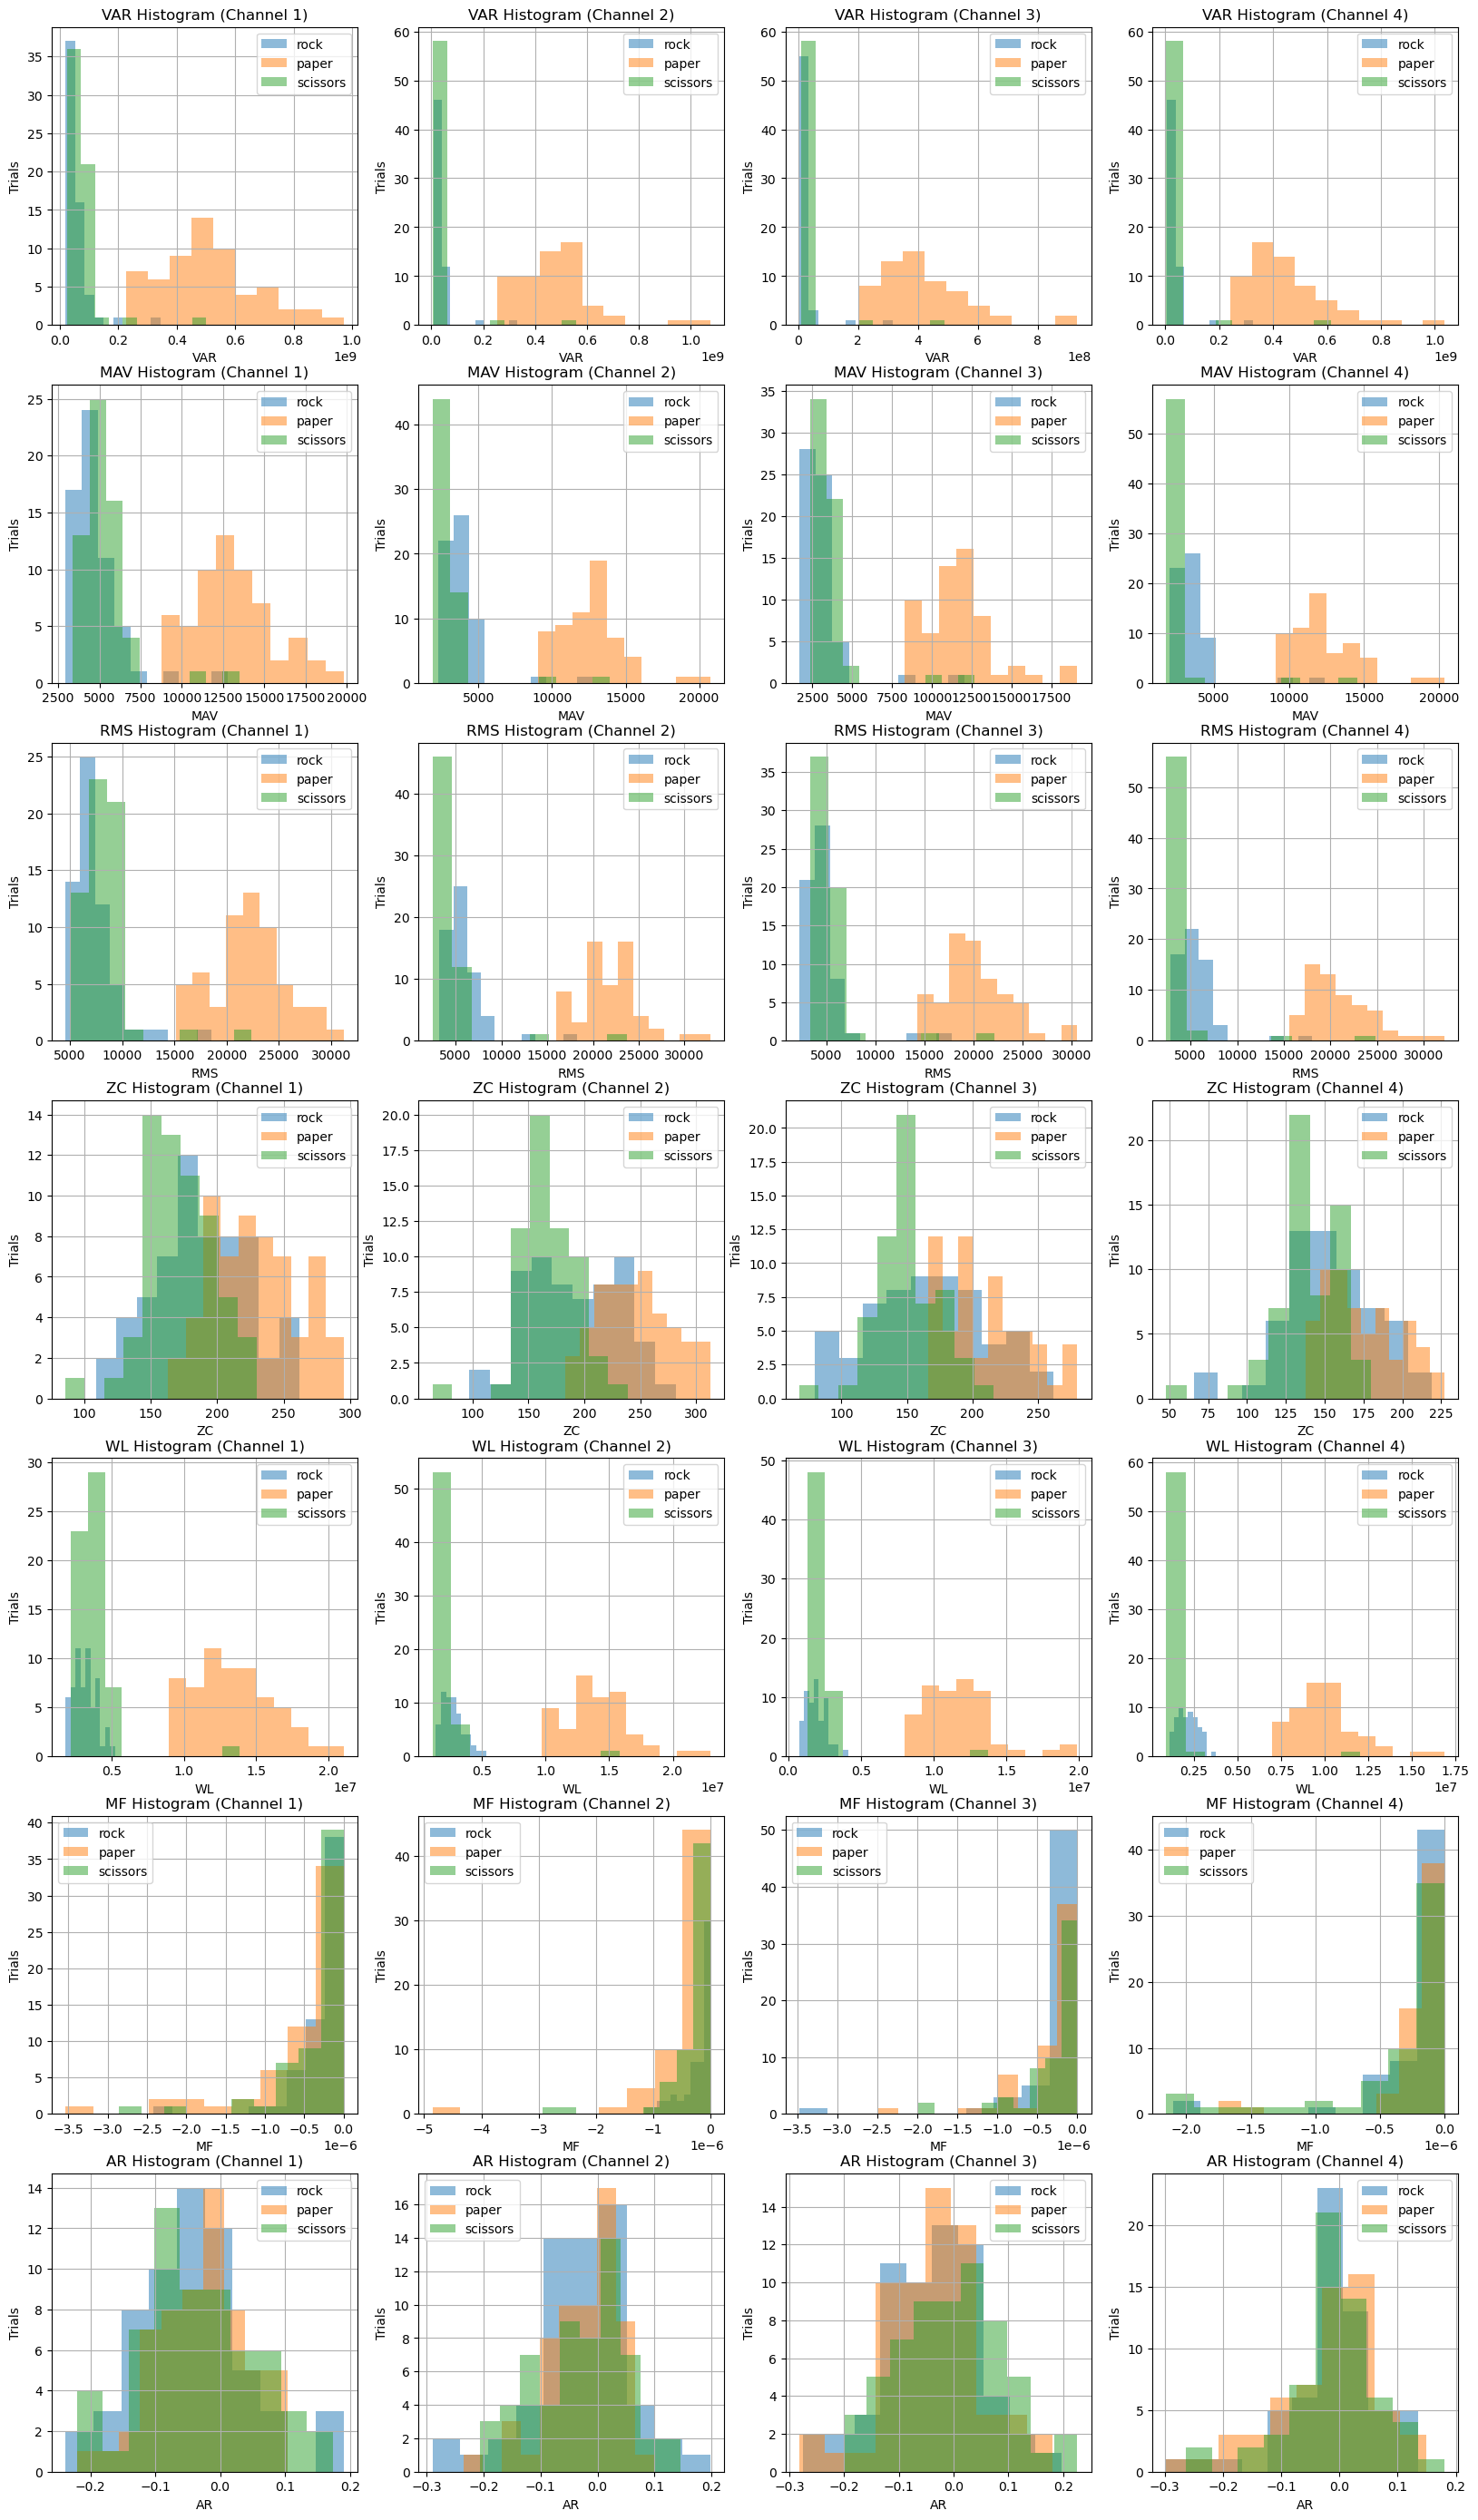

In [1]:
import numpy as np
import matplotlib.pyplot as plt #iported for plotting
import scipy.io #used for computing values
import pickle #importing to save
import ChosenFeatures # I created this list of 6 chosen features 
import Functions # holds various functions I mde to be used here

#####################################################

Tester = scipy.io.loadmat("OfflineAnalysis/exampleEMGdata120trial_test.mat")
TestData = Tester['dataChTimeTr']

Trainer = scipy.io.loadmat("OfflineAnalysis/exampleEMGdata180trial_train.mat")
# defining Trainer as 
TrainData = Trainer['dataChTimeTr']
#imported from matlab file

#####################################################

# chosen features  = RMS AR MAV VAR 
#to import chosen features I have made a file called ChosenFeatures

rps_labels = np.array(["rock", "paper", "scissors"])

test_processed = {
  "features": ChosenFeatures.extract_features(TestData),
  # flatten labels to get them to work in python
  # Since matlab indexes at 1 for some reason I subtract 1
  "labels": Tester["labels"].flatten() - 1,
  "label_names": rps_labels
}

train_processed = {
  "features": ChosenFeatures.extract_features(TrainData),
  "labels": Trainer["labels"].flatten() - 1,
  "label_names": rps_labels
}
 #####################################################
# saving the data
Functions.save("SavedTestData.pkl", test_processed)
Functions.save("SavedTrainData.pkl", train_processed)

 #####################################################
#Plotting Data


# number labels (0, 1, 2)
train_labels_num = train_processed["labels"]
# string labels ("rock", "paper", "scissors")
train_labels = train_processed["label_names"][train_labels_num]

plt.clf()

features = list(train_processed["features"].keys())

# rows = features, columns = channels
fig, axs = plt.subplots(len(features), 4, figsize=(4*5, len(features)*5))

for feature_name, feature_data in train_processed["features"].items():
  for channel in range(feature_data.shape[0]):
    ax = axs[features.index(feature_name), channel]
    for label in rps_labels:
      histogram_data = feature_data[channel, train_labels == label]
      ax.hist(histogram_data, alpha=0.5, label=label)
      ax.set_title(f"{feature_name.upper()} Histogram (Channel {channel + 1})")
      ax.set_xlabel(feature_name.upper())
      ax.set_ylabel("Trials")
      ax.grid(True)
      ax.legend()

plt.show()

variance = ChosenFeatures.variance(TestData)
